In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('data/vendas.csv')

In [3]:
df.head()

,ID_compra,filial,cidade,tipo_cliente,genero,tipo_produto,preco_unitario,quantidade,imposto_5%,total,data,hora,forma_pagamento,avaliacao
0,750-67-8428,A,Santo André,Membro,Feminino,Saúde e Beleza,74.69,7,26.1415,548.9715,2024-01-05,13:08:00,Carteira Digital,9.1
1,226-31-3081,C,São Caetano,Normal,Feminino,Eletrônicos,15.28,5,3.8200,80.2200,2024-03-08,10:29:00,Dinheiro,9.6
2,631-41-3108,A,Santo André,Normal,Masculino,Casa,46.33,7,16.2155,340.5255,2024-03-03,13:23:00,Cartão de Crédito,7.4
3,123-19-1176,A,Santo André,Membro,Masculino,Saúde e Beleza,58.22,8,23.2880,489.0480,2024-01-27,20:33:00,Carteira Digital,8.4
4,373-73-7910,A,Santo André,Normal,Masculino,Esportes e Viagem,86.31,7,30.2085,634.3785,2024-02-08,10:37:00,Carteira Digital,5.3


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID_compra        1000 non-null   object 
 1   filial           1000 non-null   object 
 2   cidade           1000 non-null   object 
 3   tipo_cliente     1000 non-null   object 
 4   genero           1000 non-null   object 
 5   tipo_produto     1000 non-null   object 
 6   preco_unitario   1000 non-null   float64
 7   quantidade       1000 non-null   int64  
 8   imposto_5%       1000 non-null   float64
 9   total            1000 non-null   float64
 10  data             1000 non-null   object 
 11  hora             1000 non-null   object 
 12  forma_pagamento  1000 non-null   object 
 13  avaliacao        1000 non-null   float64
dtypes: float64(4), int64(1), object(9)
memory usage: 109.5+ KB


In [5]:
df.duplicated().sum()

np.int64(0)

In [6]:
import os
from dotenv import load_dotenv
load_dotenv()

GROQ_API_KEY = os.getenv('GROQ_API_KEY')

In [7]:
from llama_index.core import Settings
from llama_index.llms.groq import Groq

Settings.llm = Groq(model="llama3-70b-8192", api_key=GROQ_API_KEY)

/home/josiel/dev/work/python/llama-index-study/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [8]:
from llama_index.experimental.query_engine import PandasQueryEngine

In [9]:
query_engine = PandasQueryEngine(df=df, verbose=True)

In [10]:
response = query_engine.query("Qual é a forma de pagamento mais utilizada pelos clientes de cada filial?")

INFO:httpx:HTTP Request: POST https://api.groq.com/openai/v1/chat/completions "HTTP/1.1 200 OK"
HTTP Request: POST https://api.groq.com/openai/v1/chat/completions "HTTP/1.1 200 OK"
> Pandas Instructions:
```
df.groupby('filial')['forma_pagamento'].value_counts().groupby('filial').idxmax()
```
> Pandas Output: filial
A    (A, Carteira Digital)
B    (B, Carteira Digital)
C            (C, Dinheiro)
Name: count, dtype: object


In [11]:
response = query_engine.query("Qual é o tipo de produto com maior quantidade por filial? Mostre o a filial e o tipo de produto")

INFO:httpx:HTTP Request: POST https://api.groq.com/openai/v1/chat/completions "HTTP/1.1 200 OK"
HTTP Request: POST https://api.groq.com/openai/v1/chat/completions "HTTP/1.1 200 OK"
> Pandas Instructions:
```
df.groupby(['filial', 'tipo_produto'])['quantidade'].sum().groupby('filial').idxmax()
```
> Pandas Output: filial
A                   (A, Casa)
B      (B, Esportes e Viagem)
C    (C, Alimentos e Bebidas)
Name: quantidade, dtype: object


In [12]:
response = query_engine.query("Qual a filial com maior faturamento?")

INFO:httpx:HTTP Request: POST https://api.groq.com/openai/v1/chat/completions "HTTP/1.1 200 OK"
HTTP Request: POST https://api.groq.com/openai/v1/chat/completions "HTTP/1.1 200 OK"
> Pandas Instructions:
```
df.groupby('filial')['total'].sum().idxmax()
```
> Pandas Output: C


In [13]:
df.groupby('filial')['total'].sum().idxmax()

'C'

In [14]:
query_engine = PandasQueryEngine(df=df, verbose=True, synthesize_response=True)

In [15]:
response = query_engine.query("Qual é a avaliação média de cada filial?")
print(response)

INFO:httpx:HTTP Request: POST https://api.groq.com/openai/v1/chat/completions "HTTP/1.1 200 OK"
HTTP Request: POST https://api.groq.com/openai/v1/chat/completions "HTTP/1.1 200 OK"
> Pandas Instructions:
```
df.groupby('filial')['avaliacao'].mean()
```
> Pandas Output: filial
A    7.027059
B    6.818072
C    7.072866
Name: avaliacao, dtype: float64
INFO:httpx:HTTP Request: POST https://api.groq.com/openai/v1/chat/completions "HTTP/1.1 200 OK"
HTTP Request: POST https://api.groq.com/openai/v1/chat/completions "HTTP/1.1 200 OK"
A avaliação média de cada filial é a seguinte: a filial A tem uma avaliação média de 7.03, a filial B tem uma avaliação média de 6.82 e a filial C tem uma avaliação média de 7.07.


In [16]:
import textwrap

def format_text(response):
    text = response.response
    formatted_text = textwrap.fill(text, width=100)
    print (formatted_text)

In [17]:
format_text(response)

A avaliação média de cada filial é a seguinte: a filial A tem uma avaliação média de 7.03, a filial
B tem uma avaliação média de 6.82 e a filial C tem uma avaliação média de 7.07.


In [18]:
response = query_engine.query("Você pode me mostrar a distribuição das avaliações")

INFO:httpx:HTTP Request: POST https://api.groq.com/openai/v1/chat/completions "HTTP/1.1 200 OK"
HTTP Request: POST https://api.groq.com/openai/v1/chat/completions "HTTP/1.1 200 OK"
> Pandas Instructions:
```
df['avaliacao'].value_counts()
```
> Pandas Output: avaliacao
6.0     26
6.6     24
9.5     22
4.2     22
5.1     21
        ..
5.3     11
8.3     11
4.0     11
4.6      8
10.0     5
Name: count, Length: 61, dtype: int64
INFO:httpx:HTTP Request: POST https://api.groq.com/openai/v1/chat/completions "HTTP/1.1 200 OK"
HTTP Request: POST https://api.groq.com/openai/v1/chat/completions "HTTP/1.1 200 OK"


In [19]:
format_text(response)

Here is a synthesized response based on the query results:  "A distribuição das avaliações é a
seguinte: a avaliação mais comum é 6.0, que aparece 26 vezes, seguida de 6.6, que aparece 24 vezes.
Em seguida, temos 9.5 e 4.2, que aparecem 22 vezes cada. As avaliações menores, como 4.0 e 4.6,
aparecem menos frequentemente, com 11 e 8 ocorrências, respectivamente. A avaliação mais alta, 10.0,
aparece apenas 5 vezes. Existem 61 avaliações únicas no conjunto de dados."


INFO:httpx:HTTP Request: POST https://api.groq.com/openai/v1/chat/completions "HTTP/1.1 200 OK"
HTTP Request: POST https://api.groq.com/openai/v1/chat/completions "HTTP/1.1 200 OK"
> Pandas Instructions:
```
df.avaliacao.plot(kind='hist')
```
> Pandas Output: Axes(0.125,0.11;0.775x0.77)
INFO:httpx:HTTP Request: POST https://api.groq.com/openai/v1/chat/completions "HTTP/1.1 200 OK"
HTTP Request: POST https://api.groq.com/openai/v1/chat/completions "HTTP/1.1 200 OK"


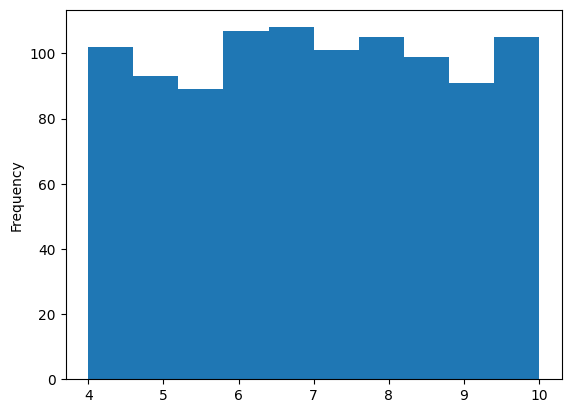

In [20]:
response = query_engine.query("Você pode me plotar a distribuição das avaliações?")

In [21]:
format_text(response)

Here is a synthesized response:  "Sim, é possível plotar a distribuição das avaliações. Aqui está o
histograma das avaliações:  [insert histogram plot here]  O gráfico acima mostra a distribuição das
avaliações, com a frequência de cada avaliação no eixo y e os valores das avaliações no eixo x. Isso
pode ajudar a entender a distribuição das avaliações e identificar padrões ou tendências."


INFO:httpx:HTTP Request: POST https://api.groq.com/openai/v1/chat/completions "HTTP/1.1 200 OK"
HTTP Request: POST https://api.groq.com/openai/v1/chat/completions "HTTP/1.1 200 OK"
> Pandas Instructions:
```
df.groupby('tipo_produto')['total'].sum().sort_values().plot(kind='barh')
```
> Pandas Output: Axes(0.125,0.11;0.775x0.77)
INFO:httpx:HTTP Request: POST https://api.groq.com/openai/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.groq.com/openai/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 2.000000 seconds
Retrying request to /chat/completions in 2.000000 seconds
INFO:httpx:HTTP Request: POST https://api.groq.com/openai/v1/chat/completions "HTTP/1.1 200 OK"
HTTP Request: POST https://api.groq.com/openai/v1/chat/completions "HTTP/1.1 200 OK"


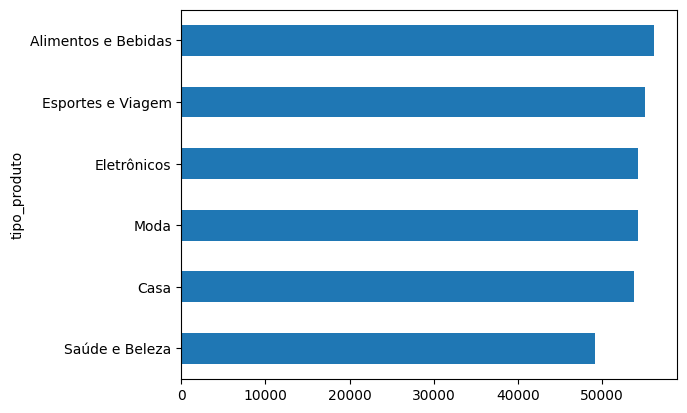

In [22]:
response = query_engine.query("Você pode plotar o valor total por tipo de produto, ordenando do menor para o maior e mantendo as barras na horizontal?")

In [23]:
format_text(response)

Sim, é possível plotar o valor total por tipo de produto, ordenando do menor para o maior e mantendo
as barras na horizontal. Para fazer isso, você pode utilizar a biblioteca Pandas e o método
`groupby` para agrupar os dados por tipo de produto, calcular a soma do valor total para cada grupo
e, em seguida, ordenar os resultados em ordem crescente. Em seguida, você pode utilizar o método
`plot` com o parâmetro `kind='barh'` para criar um gráfico de barras horizontal.  O código para
fazer isso seria: ``` df.groupby('tipo_produto')['total'].sum().sort_values().plot(kind='barh') ```
Isso irá gerar um gráfico de barras horizontal que mostra o valor total por tipo de produto,
ordenado do menor para o maior.


INFO:httpx:HTTP Request: POST https://api.groq.com/openai/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.groq.com/openai/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 5.000000 seconds
Retrying request to /chat/completions in 5.000000 seconds
INFO:httpx:HTTP Request: POST https://api.groq.com/openai/v1/chat/completions "HTTP/1.1 200 OK"
HTTP Request: POST https://api.groq.com/openai/v1/chat/completions "HTTP/1.1 200 OK"
> Pandas Instructions:
```
df.groupby('tipo_produto')['total'].sum().sort_values().plot(kind='barh')
```
> Pandas Output: Axes(0.125,0.11;0.775x0.77)
INFO:httpx:HTTP Request: POST https://api.groq.com/openai/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.groq.com/openai/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 1.000000 seconds
Retrying request to /ch

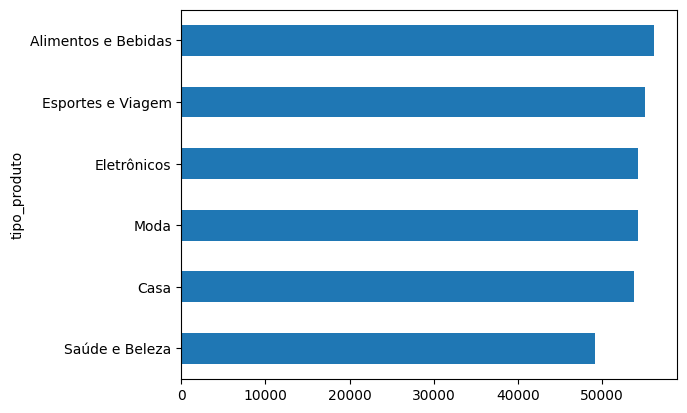

In [24]:
response = query_engine.query("Plote o valor total por tipo de produto, ordenando do menor para o maior e mantendo as barras na horizontal")

In [25]:
format_text(response)

Here is a synthesized response based on the query results:  "The plot shows the total value by type
of product, ordered from smallest to largest, with horizontal bars. The x-axis represents the total
value, and the y-axis lists the different types of products. The horizontal bars are arranged in
ascending order of their total values, allowing for easy comparison between products."


In [26]:
response = query_engine.query("Qual é o método de pagamento mais usado en cada filial? Responda em português do Brasil")
format_text(response)

INFO:httpx:HTTP Request: POST https://api.groq.com/openai/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.groq.com/openai/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 4.000000 seconds
Retrying request to /chat/completions in 4.000000 seconds
INFO:httpx:HTTP Request: POST https://api.groq.com/openai/v1/chat/completions "HTTP/1.1 200 OK"
HTTP Request: POST https://api.groq.com/openai/v1/chat/completions "HTTP/1.1 200 OK"
> Pandas Instructions:
```
df.groupby('filial')['forma_pagamento'].value_counts().groupby('filial').idxmax()
```
> Pandas Output: filial
A    (A, Carteira Digital)
B    (B, Carteira Digital)
C            (C, Dinheiro)
Name: count, dtype: object
INFO:httpx:HTTP Request: POST https://api.groq.com/openai/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.groq.com/openai/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai

INFO:httpx:HTTP Request: POST https://api.groq.com/openai/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.groq.com/openai/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 4.000000 seconds
Retrying request to /chat/completions in 4.000000 seconds
INFO:httpx:HTTP Request: POST https://api.groq.com/openai/v1/chat/completions "HTTP/1.1 200 OK"
HTTP Request: POST https://api.groq.com/openai/v1/chat/completions "HTTP/1.1 200 OK"
> Pandas Instructions:
```
df.boxplot(column='avaliacao', by='filial')
```
> Pandas Output: Axes(0.1,0.15;0.8x0.75)
INFO:httpx:HTTP Request: POST https://api.groq.com/openai/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.groq.com/openai/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 1.000000 seconds
Retrying request to /chat/completions in 1.000000 seconds

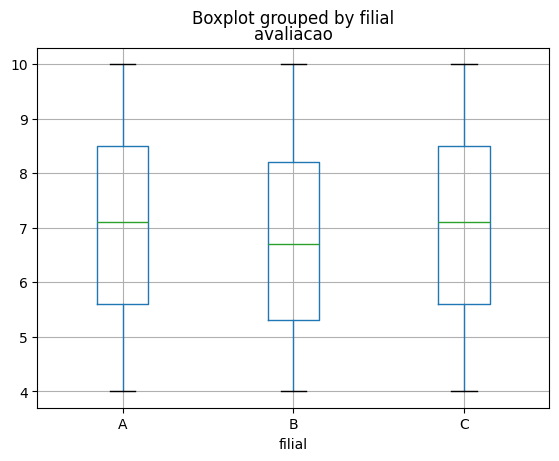

In [27]:
response = query_engine.query('Você pode plotar o boxplot das avaliações por filial?')
format_text(response)

## Pipeline

See more at https://docs.llamaindex.ai/en/stable/examples/pipeline/query_pipeline_pandas/

In [28]:
from llama_index.core import PromptTemplate
from llama_index.experimental.query_engine.pandas import PandasInstructionParser

In [29]:
def columns_description(df):
    return "\n".join([f"'{col}': {str(df[col].dtype)}" for col in df.columns])


# Instructions to guide the model in converting a natural language query into executable Python code using the Pandas library, in Portuguese, to retrieve responses in this language.
instruction_str = (
    "1. Converta a consulta para código Python executável usando Pandas.\n"
    "2. A linha final do código deve ser uma expressão Python que possa ser chamada com a função `eval()`.\n"
    "3. O código deve representar uma solução para a consulta.\n"
    "4. IMPRIMA APENAS A EXPRESSÃO.\n"
    "5. Não coloque a expressão entre aspas.\n")

# Prompt that will be sent to the model so that it generates the desired Pandas code.
pandas_prompt_str = (
    "Você está trabalhando com um dataframe do pandas em Python chamado `df`.\n"
    "{colunas_detalhes}\n\n"
    "Este é o resultado de `print(df.head())`:\n"
    "{df_str}\n\n"
    "Siga estas instruções:\n"
    "{instruction_str}\n"
    "Consulta: {query_str}\n\n"
    "Expressão:"
)

# Prompt to guide the model in synthesizing a response based on the results obtained from the Pandas query.
response_synthesis_prompt_str = (
   "Dada uma pergunta de entrada, atue como analista de dados e elabore uma resposta a partir dos resultados da consulta.\n"
   "Responda de forma natural, sem introduções como 'A resposta é:' ou algo semelhante.\n"
   "Consulta: {query_str}\n\n"
   "Instruções do Pandas (opcional):\n{pandas_instructions}\n\n"
   "Saída do Pandas: {pandas_output}\n\n"
   "Resposta:"
   "Ao final, exibir o código usado para gerar a resposta, no formato: O código utilizado foi {pandas_instructions}"
)

# Module to obtain Pandas instructions.
pandas_prompt = PromptTemplate(pandas_prompt_str).partial_format(
    instruction_str=instruction_str, colunas_detalhes=columns_description(df), df_str=df.head(5)
)
# Module to execute the Pandas instructions.
pandas_output_parser = PandasInstructionParser(df)

# Module to synthesize the response.
response_synthesis_prompt = PromptTemplate(response_synthesis_prompt_str)

# Model
llm = Groq(model='llama3-70b-8192', api_key=GROQ_API_KEY)

In [30]:
from llama_index.core.query_pipeline import QueryPipeline, Link, InputComponent

In [31]:
qp = QueryPipeline(
    modules={
        "input": InputComponent(),
        "pandas_prompt": pandas_prompt,
        "llm1": llm,
        "pandas_output_parser": pandas_output_parser,
        "response_synthesis_prompt": response_synthesis_prompt,
        "llm2": llm
    },
    verbose=True
)

qp.add_chain(["input", "pandas_prompt", "llm1",  "pandas_output_parser"])

qp.add_links(
    [
        Link("input", "response_synthesis_prompt", dest_key="query_str"),
        Link("llm1", "response_synthesis_prompt", dest_key="pandas_instructions"),
        Link("pandas_output_parser", "response_synthesis_prompt", dest_key="pandas_output")
    ]
)

qp.add_link("response_synthesis_prompt", "llm2")

In [32]:
response = qp.run(query_str="Qual é a média gasta por cada tipo de cliente?")

> Running module input with input: 
query_str: Qual é a média gasta por cada tipo de cliente?

> Running module pandas_prompt with input: 
query_str: Qual é a média gasta por cada tipo de cliente?

> Running module llm1 with input: 
messages: Você está trabalhando com um dataframe do pandas em Python chamado `df`.
'ID_compra': object
'filial': object
'cidade': object
'tipo_cliente': object
'genero': object
'tipo_produto': object
'preco_uni...

INFO:httpx:HTTP Request: POST https://api.groq.com/openai/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.groq.com/openai/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 5.000000 seconds
Retrying request to /chat/completions in 5.000000 seconds
INFO:httpx:HTTP Request: POST https://api.groq.com/openai/v1/chat/completions "HTTP/1.1 200 OK"
HTTP Request: POST https://api.groq.com/openai/v1/chat/completions "HTTP/1.1 200 OK"
> Running module pa

In [33]:
text = response.message.content
formatted_text = textwrap.fill(text, width=100)
print(formatted_text)

A média gasta por cada tipo de cliente é de R$ 327,79 para os clientes Membro e R$ 318,12 para os
clientes Normal.  O código utilizado foi df.groupby('tipo_cliente')['total'].mean()


In [34]:
response = qp.run(query_str="Por que clientes do tipo membro tem maior média de gasto?")

> Running module input with input: 
query_str: Por que clientes do tipo membro tem maior média de gasto?

> Running module pandas_prompt with input: 
query_str: Por que clientes do tipo membro tem maior média de gasto?

> Running module llm1 with input: 
messages: Você está trabalhando com um dataframe do pandas em Python chamado `df`.
'ID_compra': object
'filial': object
'cidade': object
'tipo_cliente': object
'genero': object
'tipo_produto': object
'preco_uni...

INFO:httpx:HTTP Request: POST https://api.groq.com/openai/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
HTTP Request: POST https://api.groq.com/openai/v1/chat/completions "HTTP/1.1 429 Too Many Requests"
INFO:openai._base_client:Retrying request to /chat/completions in 5.000000 seconds
Retrying request to /chat/completions in 5.000000 seconds
INFO:httpx:HTTP Request: POST https://api.groq.com/openai/v1/chat/completions "HTTP/1.1 200 OK"
HTTP Request: POST https://api.groq.com/openai/v1/chat/completions "HTTP/1.1 200 O

In [35]:
text = response.message.content
formatted_text = textwrap.fill(text, width=100)
print(formatted_text)

Os clientes do tipo membro têm uma média de gasto de R$ 327,79. Isso sugere que esses clientes
tendem a realizar compras mais frequentes ou de maior valor em comparação aos clientes não membros.
Possivelmente, os benefícios e descontos oferecidos aos membros os incentivam a realizar compras
mais regulares e de maior valor.  O código utilizado foi df.loc[df['tipo_cliente'] == 'Membro',
'total'].mean()


# Interface

With Gradio

In [36]:
def create_query_pipeline(df):
    # Instructions to guide the model in converting a natural language query into executable Python code using the Pandas library, in Portuguese, to retrieve responses in this language.
    instruction_str = (
        "1. Converta a consulta para código Python executável usando Pandas.\n"
        "2. A linha final do código deve ser uma expressão Python que possa ser chamada com a função `eval()`.\n"
        "3. O código deve representar uma solução para a consulta.\n"
        "4. IMPRIMA APENAS A EXPRESSÃO.\n"
        "5. Não coloque a expressão entre aspas.\n")

    # Prompt that will be sent to the model so that it generates the desired Pandas code.
    pandas_prompt_str = (
        "Você está trabalhando com um dataframe do pandas em Python chamado `df`.\n"
        "{colunas_detalhes}\n\n"
        "Este é o resultado de `print(df.head())`:\n"
        "{df_str}\n\n"
        "Siga estas instruções:\n"
        "{instruction_str}\n"
        "Consulta: {query_str}\n\n"
        "Expressão:"
    )

    # Prompt to guide the model in synthesizing a response based on the results obtained from the Pandas query.
    response_synthesis_prompt_str = (
    "Dada uma pergunta de entrada, atue como analista de dados e elabore uma resposta a partir dos resultados da consulta.\n"
    "Responda de forma natural, sem introduções como 'A resposta é:' ou algo semelhante.\n"
    "Consulta: {query_str}\n\n"
    "Instruções do Pandas (opcional):\n{pandas_instructions}\n\n"
    "Saída do Pandas: {pandas_output}\n\n"
    "Resposta:"
    "Ao final, exibir o código usado para gerar a resposta, no formato: O código utilizado foi {pandas_instructions}"
    )

    # Module to obtain Pandas instructions.
    pandas_prompt = PromptTemplate(pandas_prompt_str).partial_format(
        instruction_str=instruction_str, colunas_detalhes=columns_description(df), df_str=df.head(5)
    )
    # Module to execute the Pandas instructions.
    pandas_output_parser = PandasInstructionParser(df)

    # Module to synthesize the response.
    response_synthesis_prompt = PromptTemplate(response_synthesis_prompt_str)

    # Model
    llm = Groq(model='llama3-70b-8192', api_key=GROQ_API_KEY)

    qp = QueryPipeline(
    modules={
        "input": InputComponent(),
        "pandas_prompt": pandas_prompt,
        "llm1": llm,
        "pandas_output_parser": pandas_output_parser,
        "response_synthesis_prompt": response_synthesis_prompt,
        "llm2": llm
    },
    verbose=True
    )

    qp.add_chain(["input", "pandas_prompt", "llm1",  "pandas_output_parser"])

    qp.add_links(
        [
            Link("input", "response_synthesis_prompt", dest_key="query_str"),
            Link("llm1", "response_synthesis_prompt", dest_key="pandas_instructions"),
            Link("pandas_output_parser", "response_synthesis_prompt", dest_key="pandas_output")
        ]
    )

    qp.add_link("response_synthesis_prompt", "llm2")

    return qp

In [37]:
import gradio as gr
from fpdf import FPDF
from datetime import datetime

def load_data(file_path, df_state):
    if file_path is None and df_state is None:
        return 'Please upload a CSV file.', df_state
    try:
        df = pd.read_csv(file_path)
        return 'File load successfuly', df
    except Exception as e:
        return f'Error on loading the file: {str(e)}', df_state

def proccess_query(query, df_state):
    if df_state is not None and query is not None:
        qp = create_query_pipeline(df_state)
        response = qp.run(query_str=query)
        return response.message.content
    
    return ''

def add_history(question, answer, history_state):
    if question and answer:
        history_state.append((question, answer))
        return history_state

def generate_pdf(history_state):
    if not history_state:
        return "There is not information to generate a PFD file", None
    timestamp = datetime.now().strftime("%Y%m%d%H%M%S")
    output_file = f"data/question_answer_report_{timestamp}.pdf"
    
    pdf = FPDF()
    pdf.add_page()
    pdf.set_auto_page_break(auto=True, margin=15)

    for question, answer in history_state:
        pdf.set_font('Arial', "B", 14)
        pdf.multi_cell(0, 8, txt=question)
        pdf.ln(2)
        pdf.set_font('Arial', "", 12)
        pdf.multi_cell(0, 8, txt=answer)
        pdf.ln(6)

    pdf.output(output_file)
    return output_file


with gr.Blocks() as app:
    file_input = gr.File(file_count ='single', type = 'filepath', label='Upload a CSV file')
    upload_status = gr.Textbox(label='Upload status')
    query_input = gr.Textbox(label='Type yout question about the dataset')
    submit_button = gr.Button('Send')
    response_output = gr.Textbox(label='Response')
    add_pdf_button = gr.Button('Add history to PDF')
    generate_pdf_button = gr.Button('Generate PDF')
    pdf_file = gr.File(label='PDF Download')

    df_state = gr.State(value=None)
    history_state = gr.State(value=[])

    file_input.change(fn=load_data,
                      inputs=[file_input, df_state],
                      outputs=[upload_status, df_state])
    
    submit_button.click(fn=proccess_query,
                        inputs=[query_input, df_state],
                        outputs=[response_output])
    
    add_pdf_button.click(fn=add_history,
                         inputs=[query_input, response_output, history_state],
                         outputs=history_state)
    
    generate_pdf_button.click(fn=generate_pdf,
                              inputs=[history_state],
                              outputs=pdf_file)
    

app.launch(debug=True)

* Running on local URL:  http://127.0.0.1:7860
INFO:httpx:HTTP Request: GET http://127.0.0.1:7860/gradio_api/startup-events "HTTP/1.1 200 OK"
HTTP Request: GET http://127.0.0.1:7860/gradio_api/startup-events "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: HEAD http://127.0.0.1:7860/ "HTTP/1.1 200 OK"
HTTP Request: HEAD http://127.0.0.1:7860/ "HTTP/1.1 200 OK"

To create a public link, set `share=True` in `launch()`.


INFO:httpx:HTTP Request: GET https://api.gradio.app/gradio-messaging/en "HTTP/1.1 200 OK"
HTTP Request: GET https://api.gradio.app/gradio-messaging/en "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: GET https://api.gradio.app/pkg-version "HTTP/1.1 200 OK"
HTTP Request: GET https://api.gradio.app/pkg-version "HTTP/1.1 200 OK"
> Running module input with input: 
query_str: me de insights do arquivo

> Running module pandas_prompt with input: 
query_str: me de insights do arquivo

> Running module llm1 with input: 
messages: Você está trabalhando com um dataframe do pandas em Python chamado `df`.
'ID_compra': object
'filial': object
'cidade': object
'tipo_cliente': object
'genero': object
'tipo_produto': object
'preco_uni...

INFO:httpx:HTTP Request: POST https://api.groq.com/openai/v1/chat/completions "HTTP/1.1 200 OK"
HTTP Request: POST https://api.groq.com/openai/v1/chat/completions "HTTP/1.1 200 OK"
> Running module pandas_output_parser with input: 
input: assistant: df.describe()

> Runni

Traceback (most recent call last):
  File "/home/josiel/dev/work/python/llama-index-study/.venv/lib/python3.12/site-packages/llama_index/experimental/query_engine/pandas/output_parser.py", line 63, in default_output_processor
    output_str = str(safe_eval(module_end_str, global_vars, local_vars))
                     ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/josiel/dev/work/python/llama-index-study/.venv/lib/python3.12/site-packages/llama_index/experimental/exec_utils.py", line 159, in safe_eval
    return eval(__source, _get_restricted_globals(__globals), __locals)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "<string>", line 1, in <module>
  File "/home/josiel/dev/work/python/llama-index-study/.venv/lib/python3.12/site-packages/pandas/core/frame.py", line 7189, in sort_values
    k = self._get_label_or_level_values(by[0], axis=axis)
        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/josiel/dev/work/python/

INFO:httpx:HTTP Request: POST https://api.groq.com/openai/v1/chat/completions "HTTP/1.1 200 OK"
HTTP Request: POST https://api.groq.com/openai/v1/chat/completions "HTTP/1.1 200 OK"
Keyboard interruption in main thread... closing server.
